<a href="https://colab.research.google.com/github/Andrewsabastian531/task-2/blob/main/linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

**Data Input**

In [3]:
data=pd.read_csv("50_Startups.csv")

In [4]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
print("number of rows:",data.shape[0])
print("number of columns:",data.shape[1])

number of rows: 50
number of columns: 5


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,38.000000,32.000000,50.000000,50.000000
mean,84471.755526,124460.951250,211025.097800,112012.639200
std,47140.937802,24360.580496,122290.310726,40306.180338
min,0.000000,51743.150000,0.000000,14681.400000
25%,65716.990000,113049.002500,129300.132500,90138.902500
50%,82404.585000,125604.625000,212716.240000,107978.190000
75%,120392.700000,145190.700000,299469.085000,139765.977500
max,165349.200000,157693.920000,471784.100000,192261.830000


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [11]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [12]:
data.nunique()

R&D Spend          37
Administration     32
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [13]:
data.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

In [14]:
df = pd.get_dummies(data, columns=['State'], prefix='')
df

,R&D Spend,Administration,Marketing Spend,Profit,_California,_Florida,_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


**Data Representation Through Graphs**

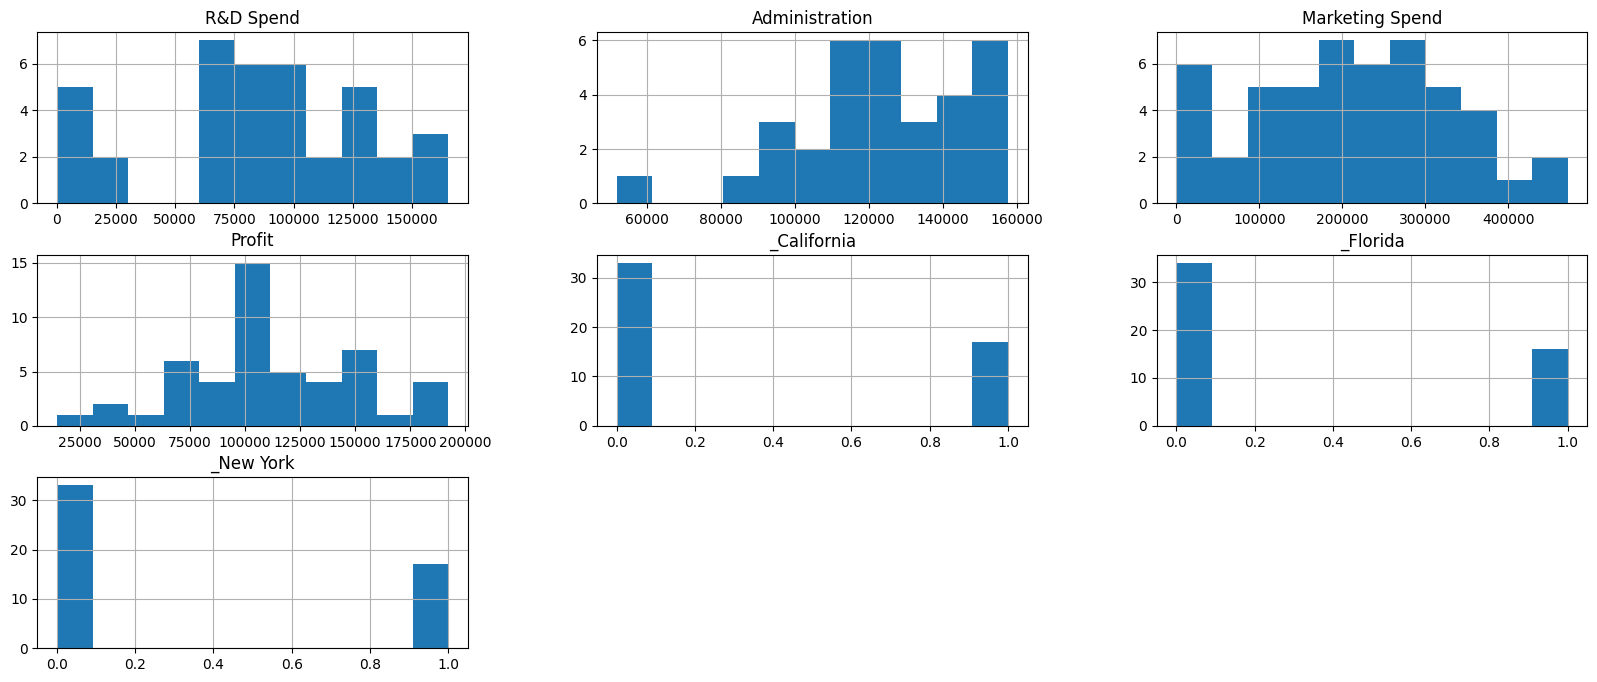

In [15]:
df.hist(figsize=(20,8) , bins=11)
plt.show()

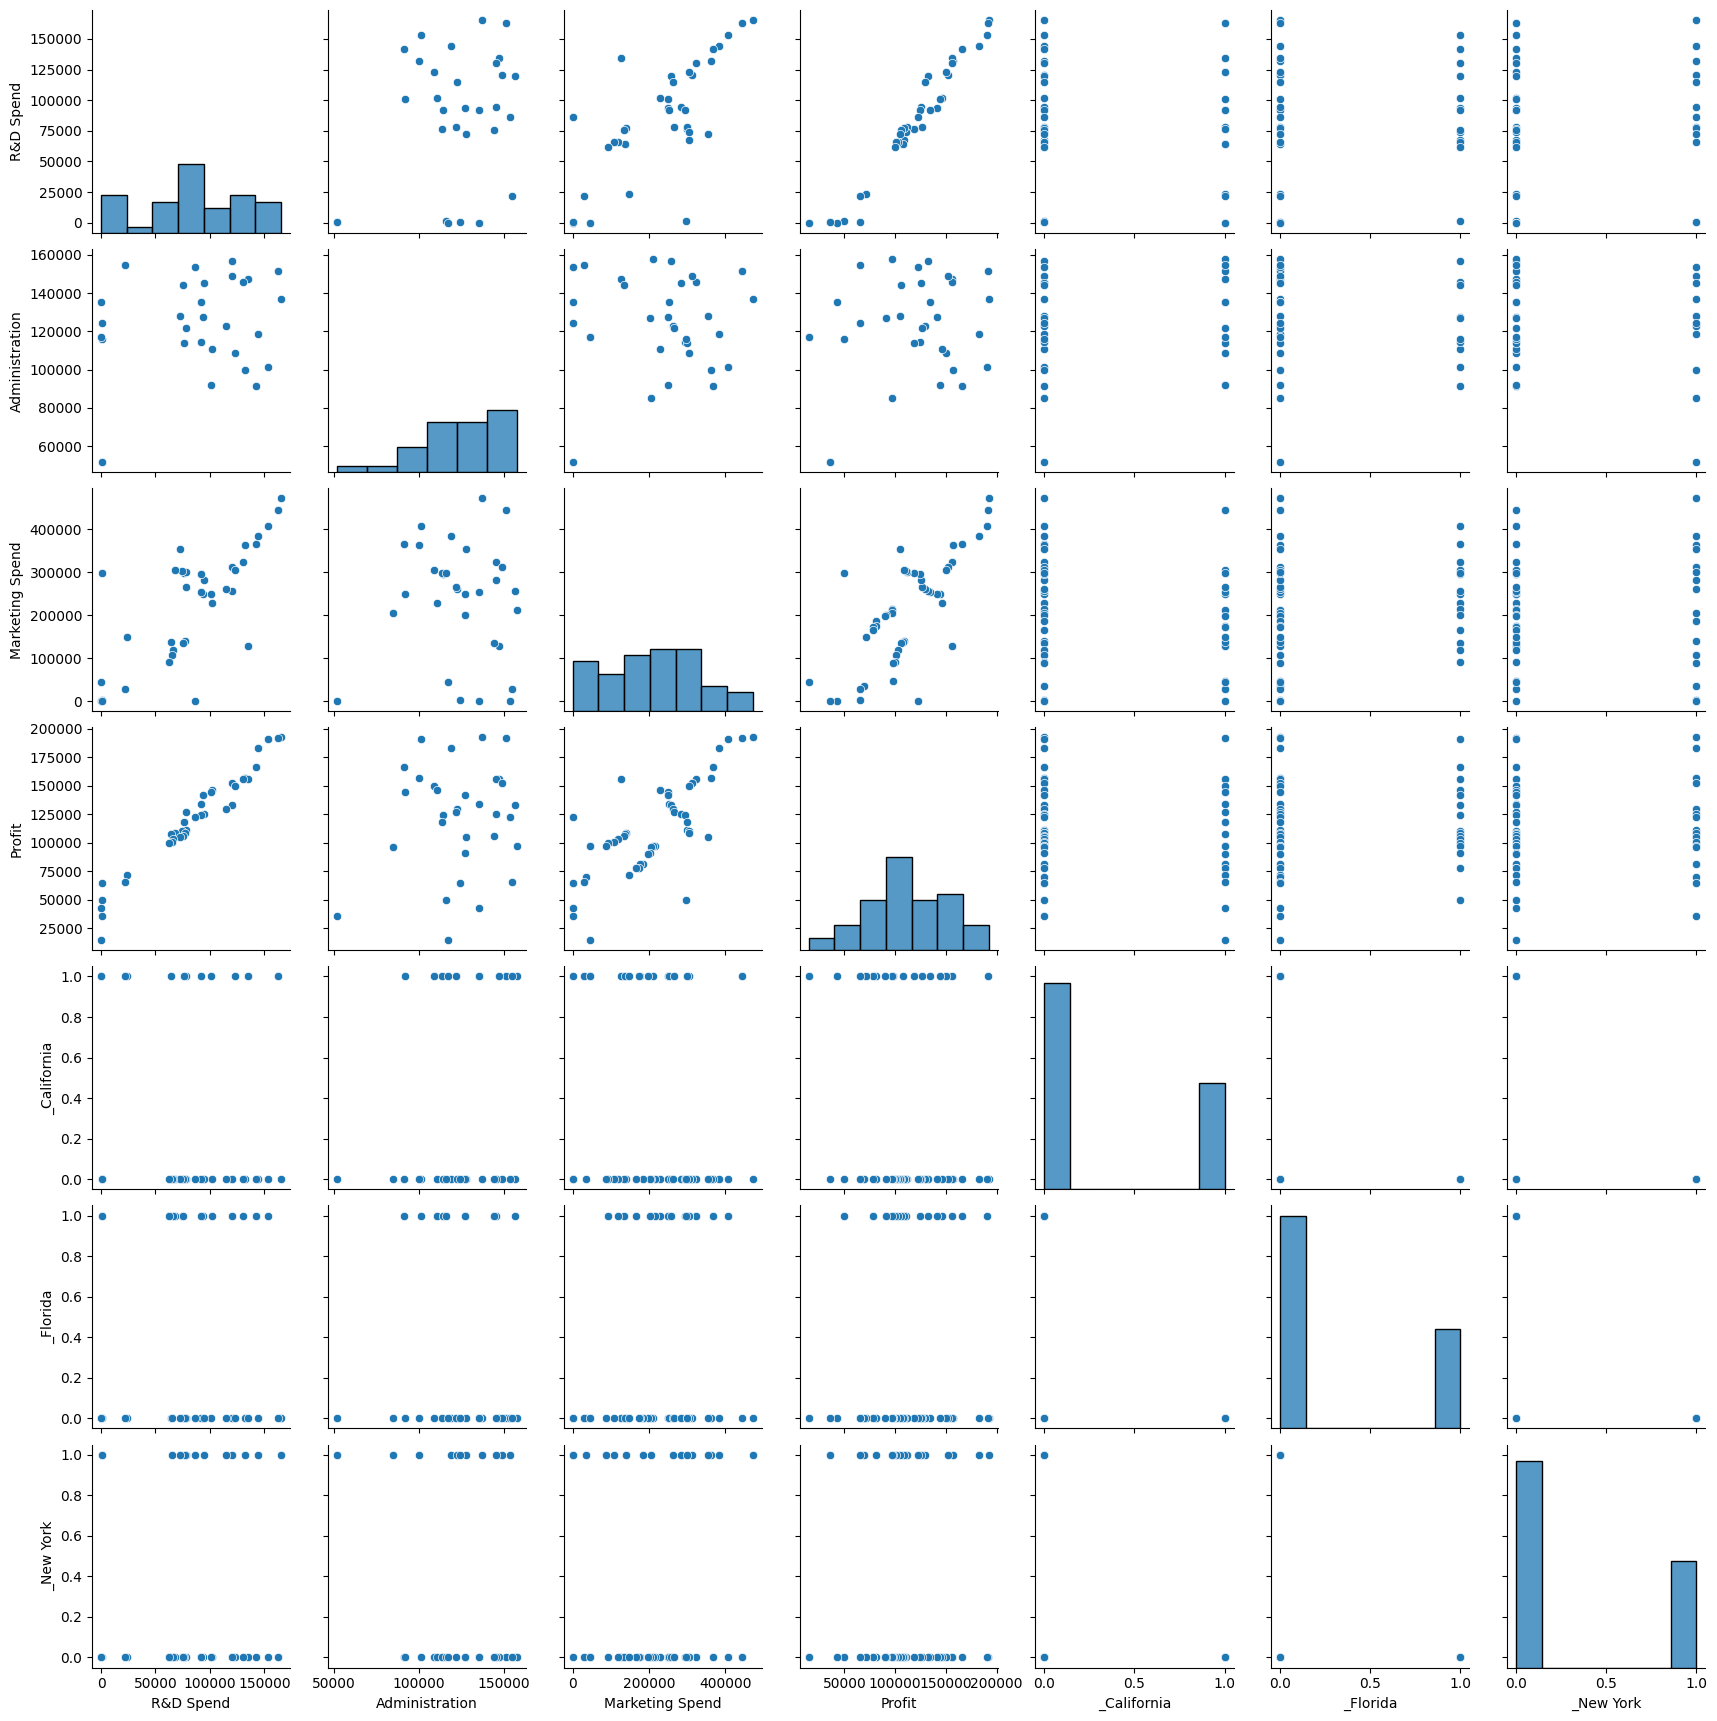

In [16]:
sns.pairplot(df,kind='scatter')


<Axes: >

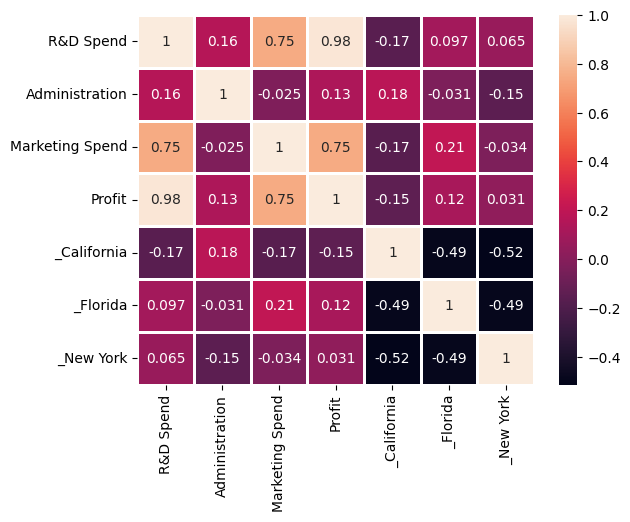

In [17]:
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 0.99)

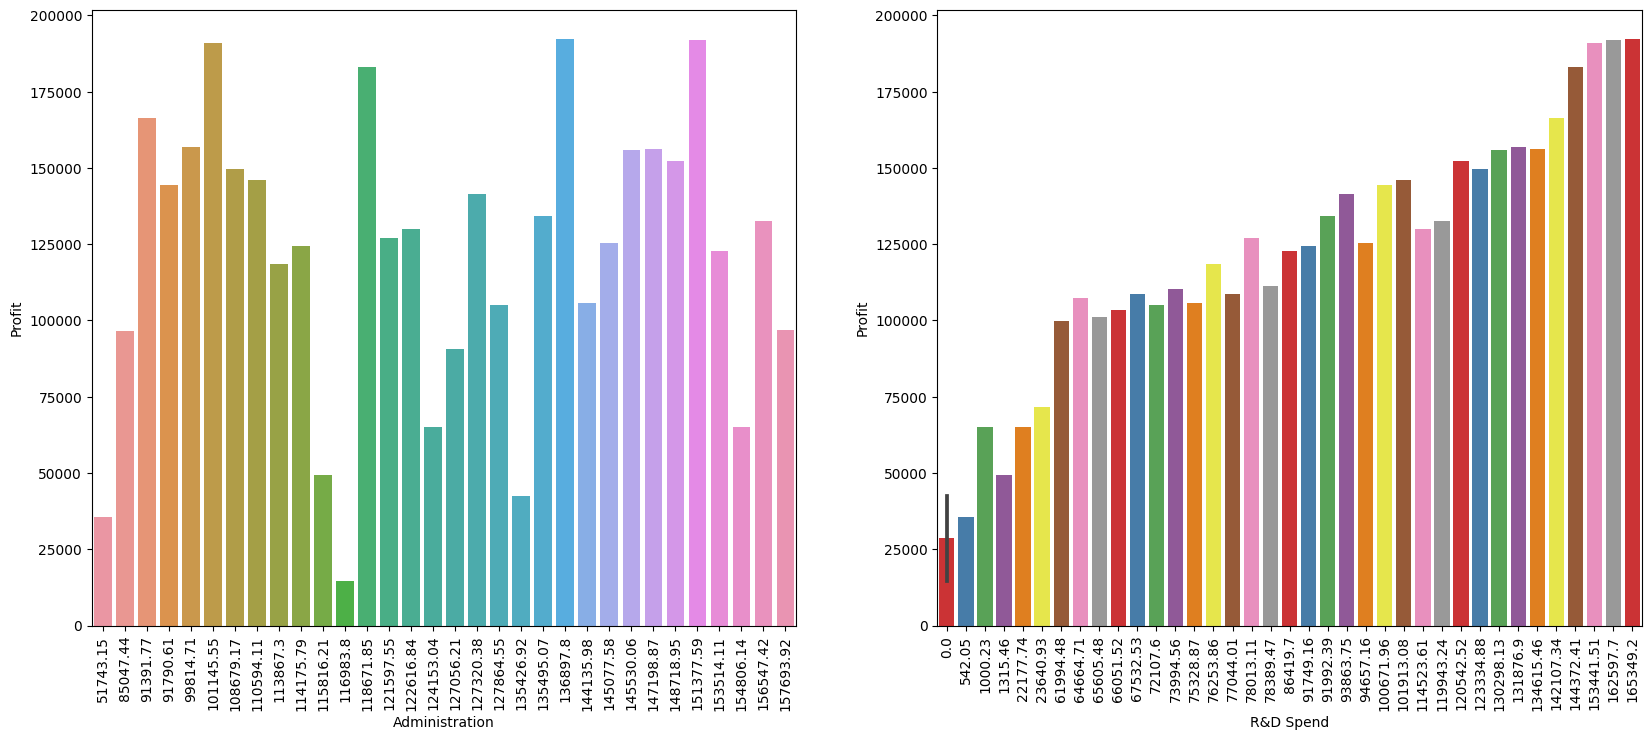

In [18]:
fig, axes = plt.subplots(1,2, figsize = (20,8))
sns.barplot(x = 'R&D Spend', y = 'Profit', data = df, palette = 'Set1', ax = axes[1])
sns.barplot(x='Administration',y = 'Profit' ,data = df, ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.show()

In [19]:
x=df.iloc[:,[0,1,2,4,5,6]].values
y=df.iloc[:,3].values

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
x=imputer.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2529)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 6), (15, 6), (35,), (15,))

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
y_pred

array([106659.13985759,  26804.19690202, 108236.65979876,  30230.00882195,
        59552.59896646, 122027.39318424,  90706.85757283,  63210.86672713,
       110792.00540305, 192059.79021646, 135725.23431242, 186916.98832652,
       123407.23130461, 156392.30053432,  99628.05392342])

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [29]:
mean_absolute_error(y_test, y_pred)

15829.347794345611

In [30]:
mean_absolute_percentage_error(y_test,y_pred)

0.1839233915237464

In [33]:
r2_score(y_test, y_pred)

0.8385400004548658